In [1]:
from numpy.random import rand, randint
from numpy import linspace, meshgrid
from matplotlib.pyplot import imshow, plot, axis
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

# define matrix
C = randint(5, size=(10, 10))

imshow(C, cmap='Greys', interpolation='none');
x = linspace(-.5,9.5,11); 
y = x;
[X,Y] = meshgrid(x,y);
plot(X.T,Y.T,'r');
plot(X,Y,'r');
axis('scaled');
axis([-1, 10, -1, 10]);




(10, 10)


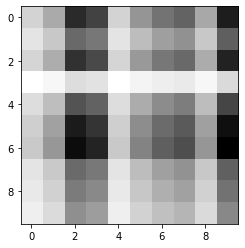

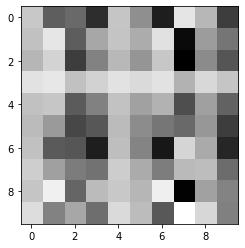

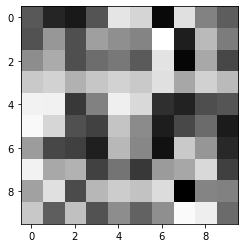

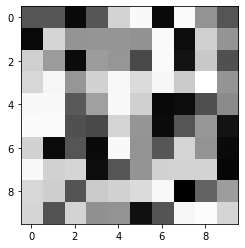

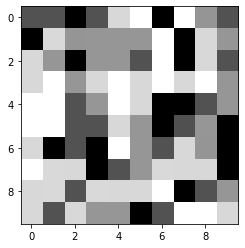

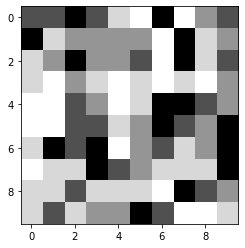

In [2]:
U, sigma, V = np.linalg.svd(C)
print(U.shape)
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
plt.imshow(reconstimg, cmap='Greys');
plt.show()
reconstimg = np.matrix(U[:, :2]) * np.diag(sigma[:2]) * np.matrix(V[:2, :])
plt.imshow(reconstimg, cmap='Greys');
plt.show()
reconstimg = np.matrix(U[:, :4]) * np.diag(sigma[:4]) * np.matrix(V[:4, :])
plt.imshow(reconstimg, cmap='Greys');
plt.show()
reconstimg = np.matrix(U[:, :8]) * np.diag(sigma[:8]) * np.matrix(V[:8, :])
plt.imshow(reconstimg, cmap='Greys');
plt.show()
reconstimg = np.matrix(U[:, :11]) * np.diag(sigma[:11]) * np.matrix(V[:11, :])
plt.imshow(reconstimg, cmap='Greys');
plt.show()
imshow(C, cmap='Greys', interpolation='none');
plt.show()

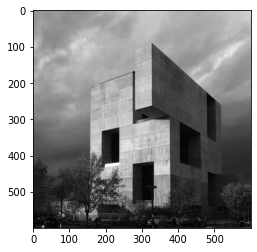

In [3]:
img = Image.open('edif_elemental.png')
imggray = img.convert('LA')
#plt.figure(figsize=(9, 6))
plt.imshow(imggray);

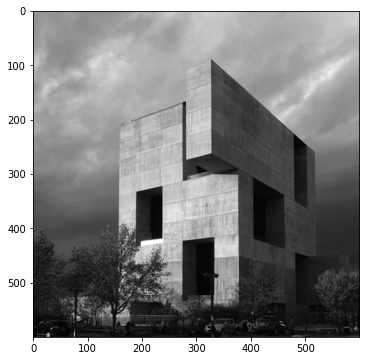

In [4]:
# convert to matrix
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

In [5]:
U, sigma, V = np.linalg.svd(imgmat)

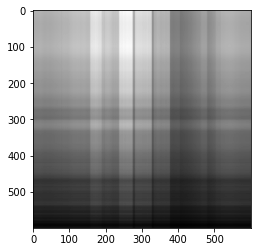

In [6]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
plt.imshow(reconstimg, cmap='gray');

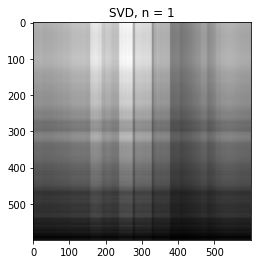

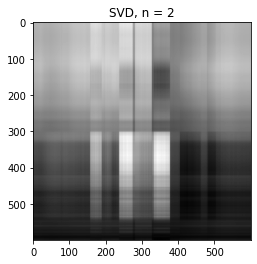

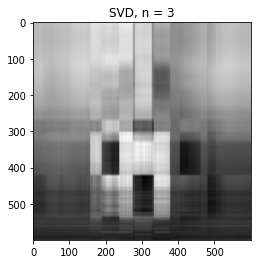

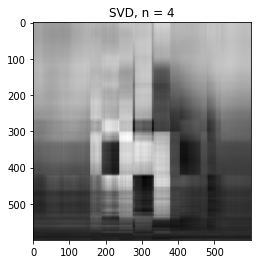

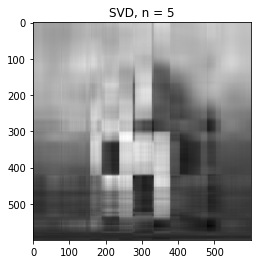

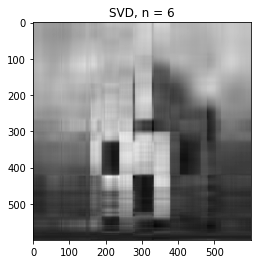

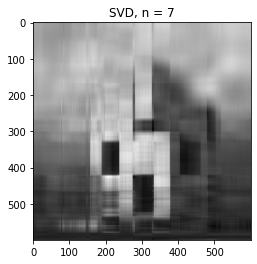

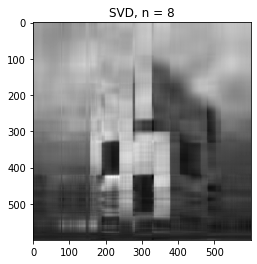

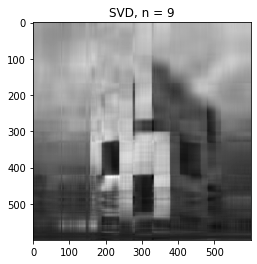

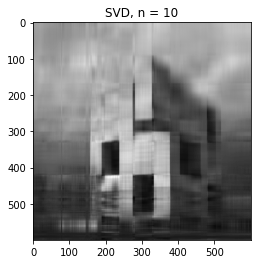

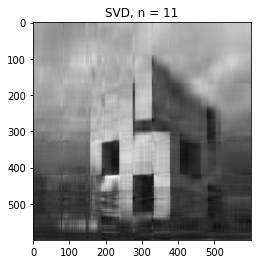

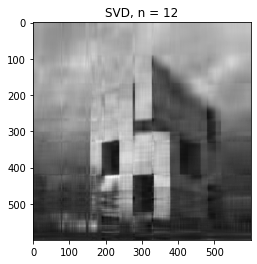

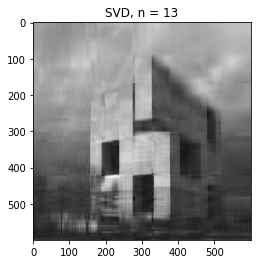

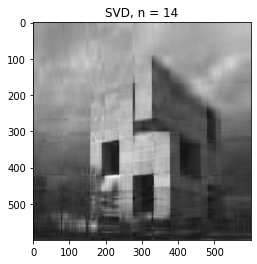

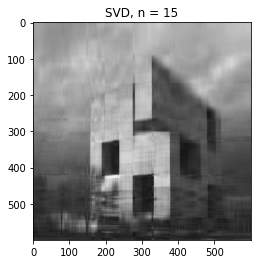

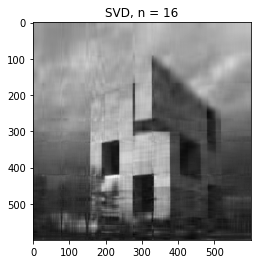

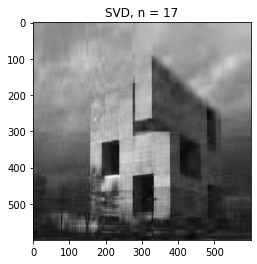

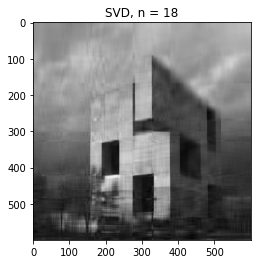

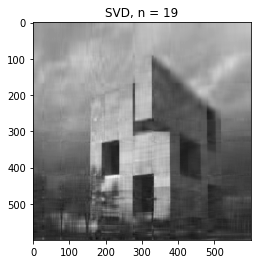

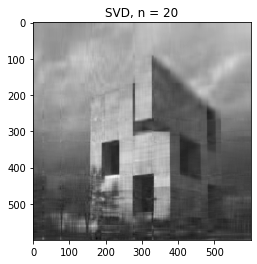

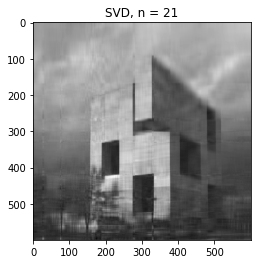

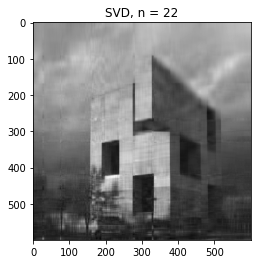

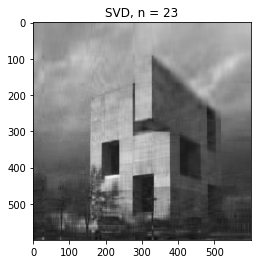

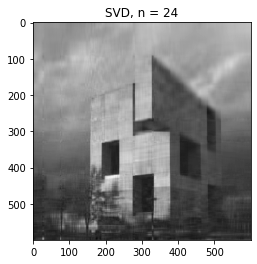

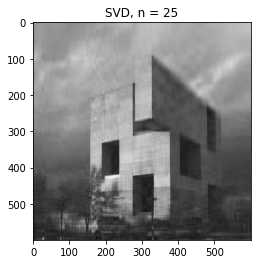

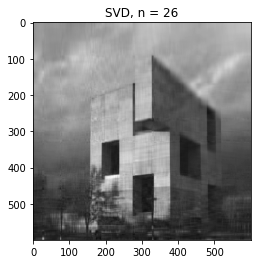

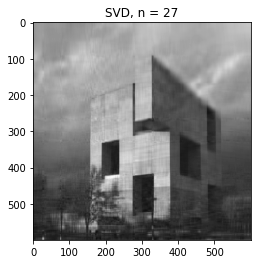

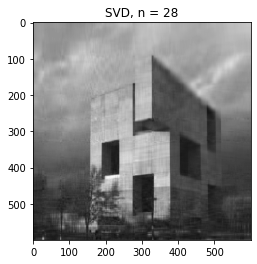

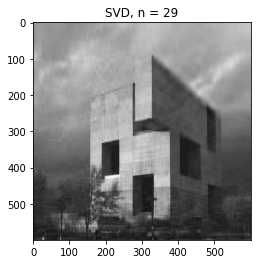

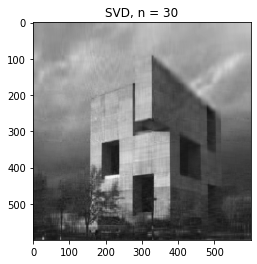

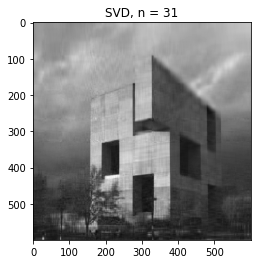

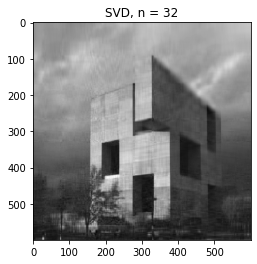

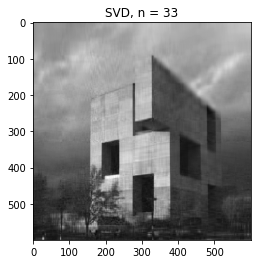

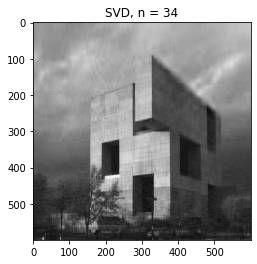

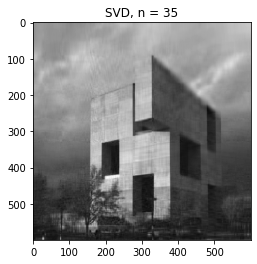

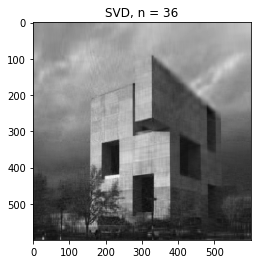

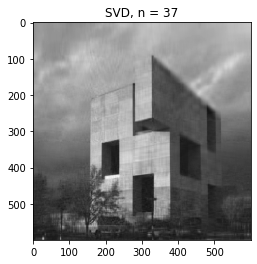

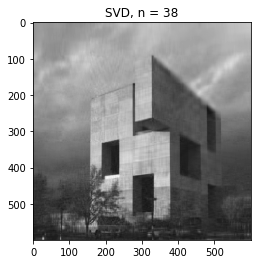

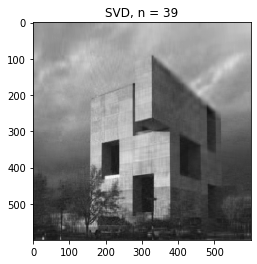

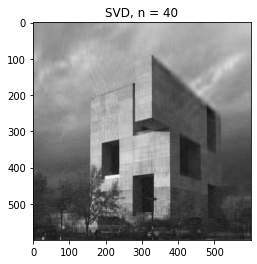

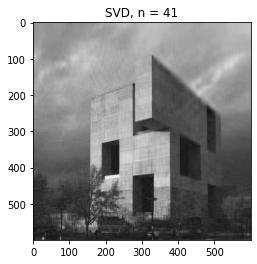

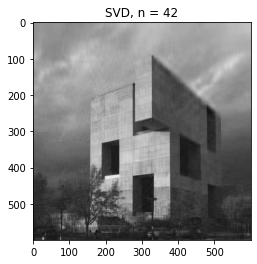

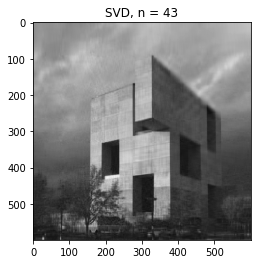

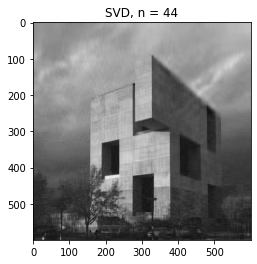

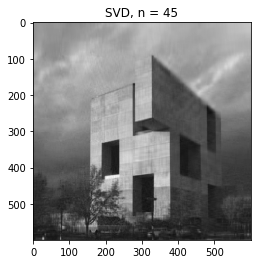

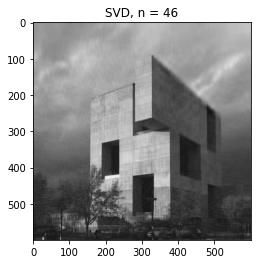

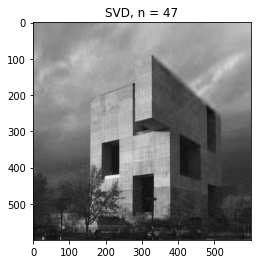

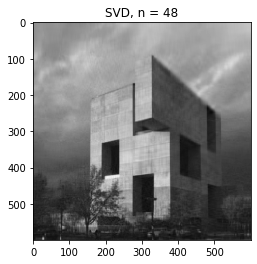

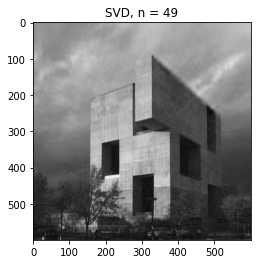

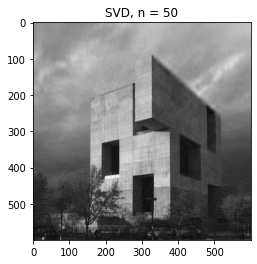

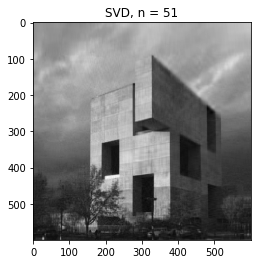

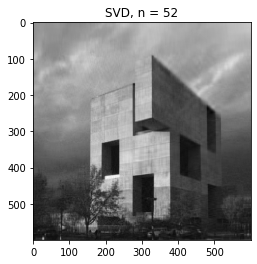

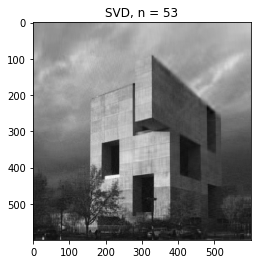

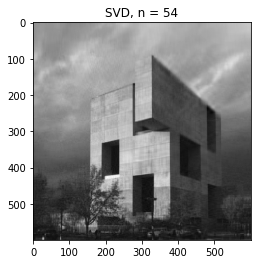

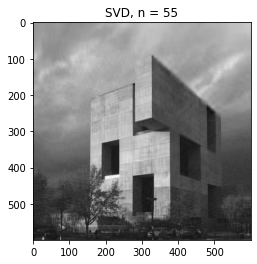

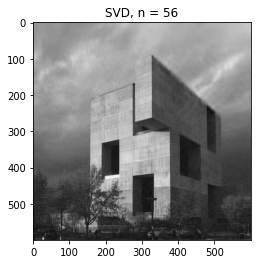

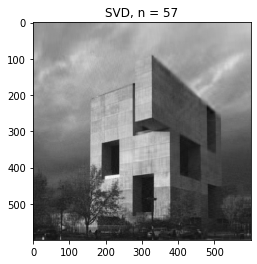

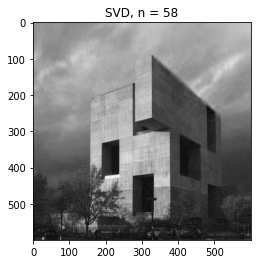

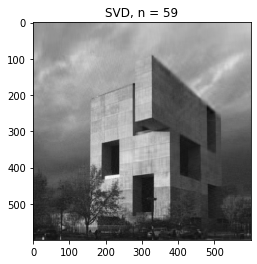

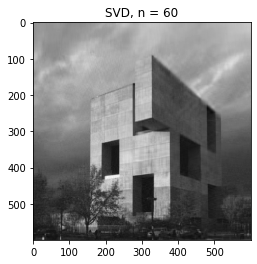

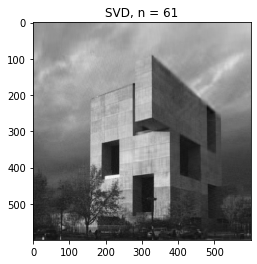

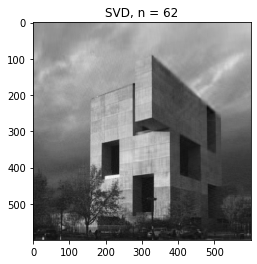

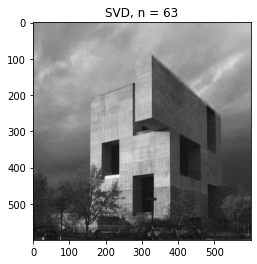

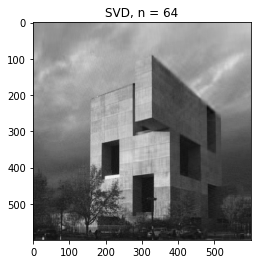

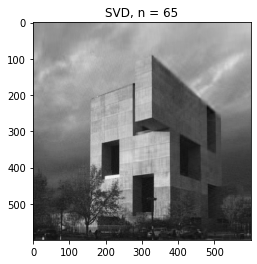

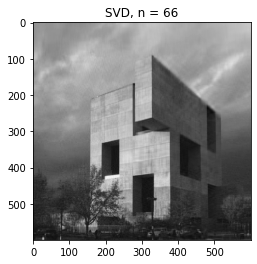

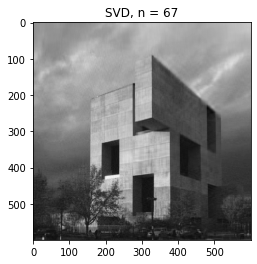

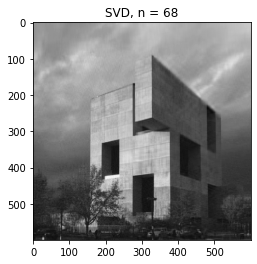

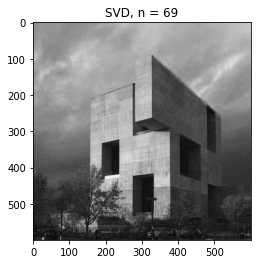

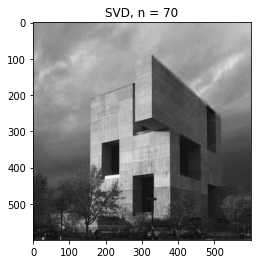

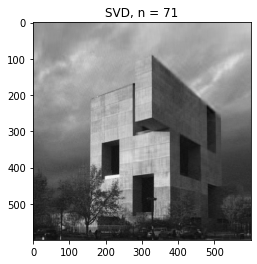

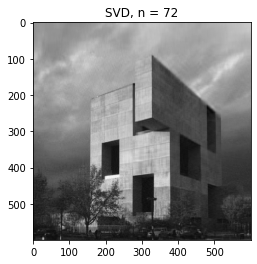

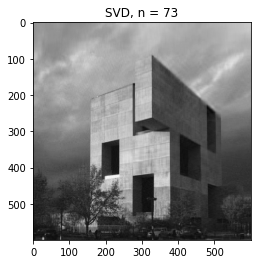

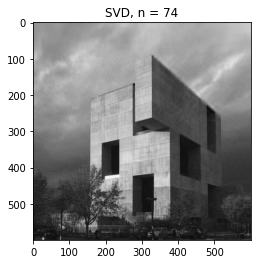

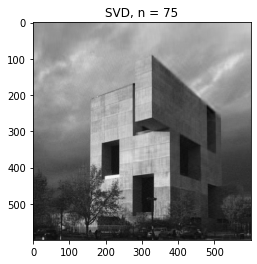

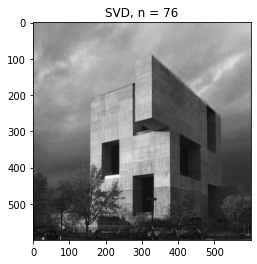

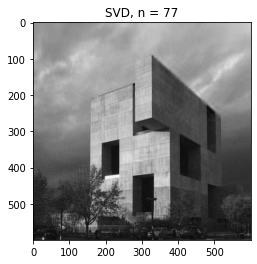

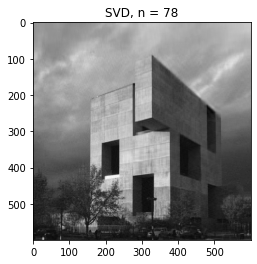

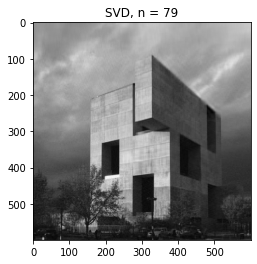

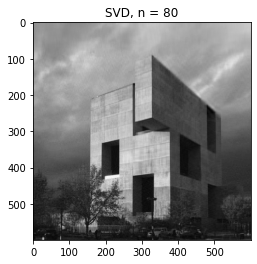

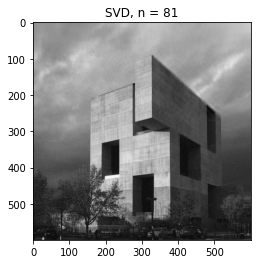

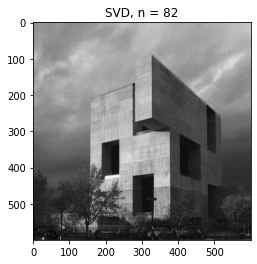

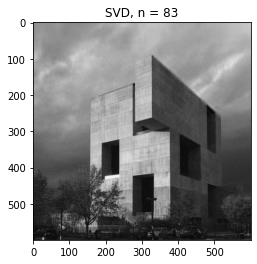

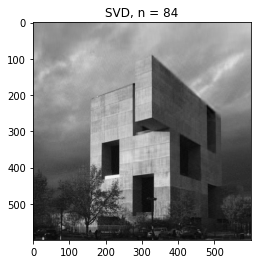

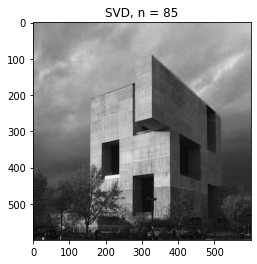

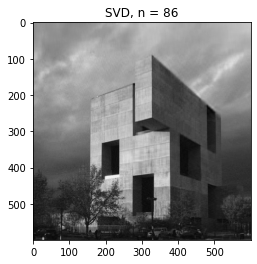

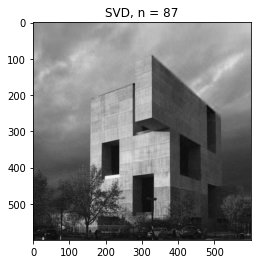

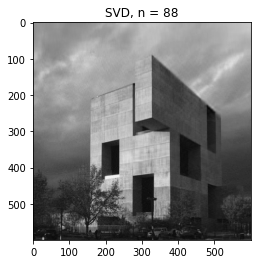

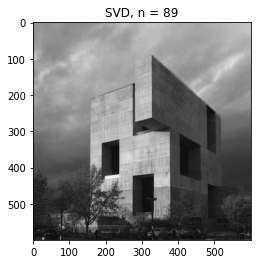

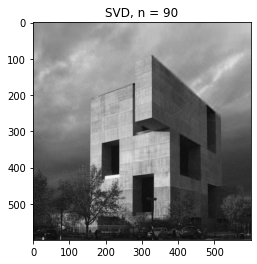

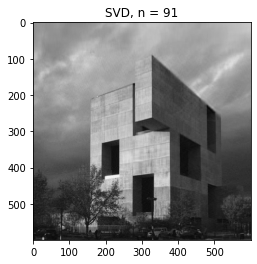

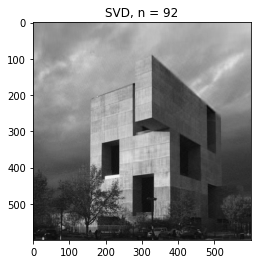

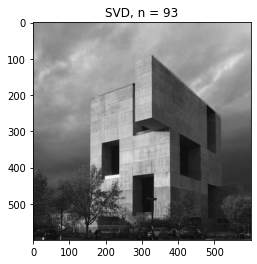

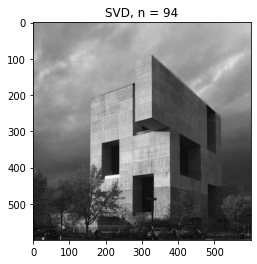

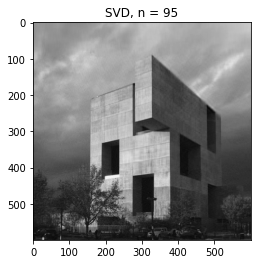

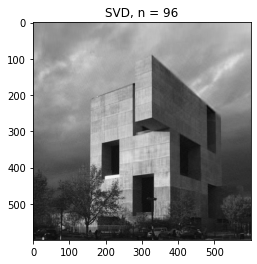

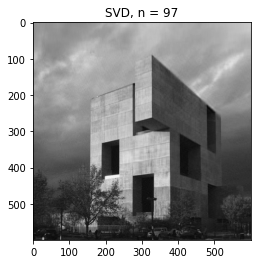

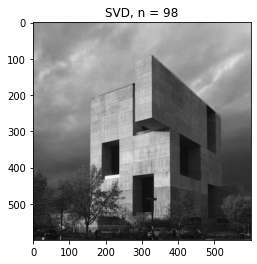

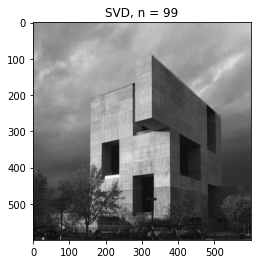

In [11]:
for i in range(1, 100):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "SVD, n = %s" % i
    plt.title(title)
    plt.savefig('SVDn%s'%i)
    plt.show()

# Animation

In [12]:
from matplotlib.animation import FuncAnimation

MovieWriter ffmpeg unavailable; using Pillow instead.


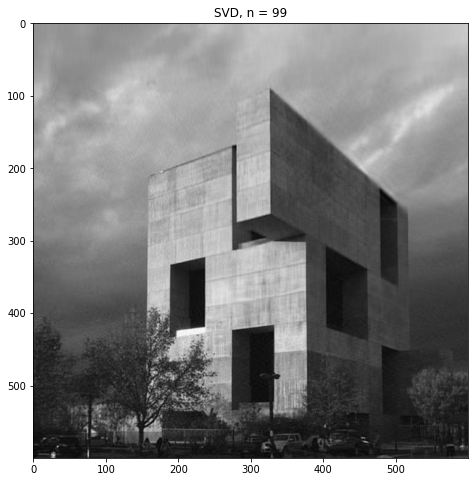

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
def update(i):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    ax.imshow(reconstimg, cmap='gray')
    title = "SVD, n = %s" % i
    plt.title(title)
 
anim = FuncAnimation(fig, update, frames = 100, interval=100)
anim.save('SVD_elemental.gif', dpi=200) 
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


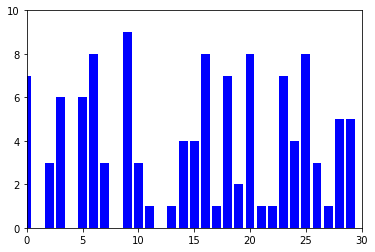

In [15]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
 
fig, ax = plt.subplots()
x = range(30) 
y = [0] * 30
 
bars = ax.bar(x, y, color="blue")
ax.axis([0, 30, 0, 10])
 
def update(i):
    y[i] = np.random.randint(0, 10)
    bars[i].set_height(y[i])
 
anim = FuncAnimation(fig, update, frames = 30, interval=100)
anim.save('myanimation.gif') 
plt.show()

[[[214 183  55]
  [215 217 211]
  [ 70  98  44]]

 [[ 71 123  21]
  [167 203   2]
  [242  21 134]]

 [[237 213 225]
  [ 25 112 230]
  [224  78 106]]]


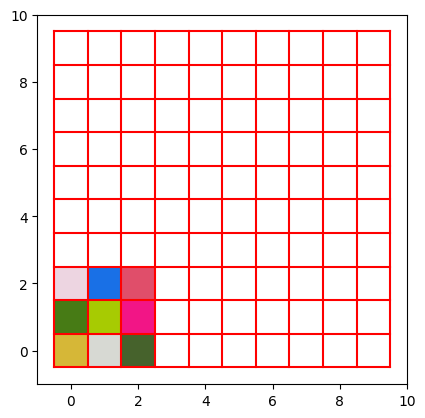

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)
    Display data as an image, i.e., on a 2D regular raster.
    
    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displaying a grayscale
    image set up the color mapping using the parameters
    ``cmap='gray', vmin=0, vmax=255``.
    
    The number of pixels used to render an image is set by the axes size
    and the *dpi* of the figure. This can lead to aliasing artifacts when
    the image is resampled because the displayed image size will usually
    not match the size of *X* (see
    :doc:`/gallery/images_contours_and_fields/image_antialiasing`).
    The resampling can be controlled via the *interpolation* parameter
    and/or :rc:`image.interpolation`

In [10]:
# define matrix
# C = randint(255, size=(3, 3, 3))


C = np.array([[[214, 183,  55],[215, 217, 211],[ 70,  98,  44]],
              [[ 71, 123,  21],[167, 203,   2],[242 , 21, 134]],
              [[237, 213 ,225],[ 25 ,112 ,230],[224 , 78 ,106]]])
print(C)
imshow(C, interpolation='none');
x = linspace(-.5,9.5,11); 
y = x;
[X,Y] = meshgrid(x,y);
plot(X.T,Y.T,'r');
plot(X,Y,'r');
axis('scaled');
axis([-1, 10, -1, 10]);
plt.show()

help(imshow)

[[219  85 223]
 [187  32  41]
 [138  63 196]]
[[219  85 223]
 [187  32  41]
 [138  63 196]]
[[219  85 223]
 [187  32  41]
 [138  63 196]]


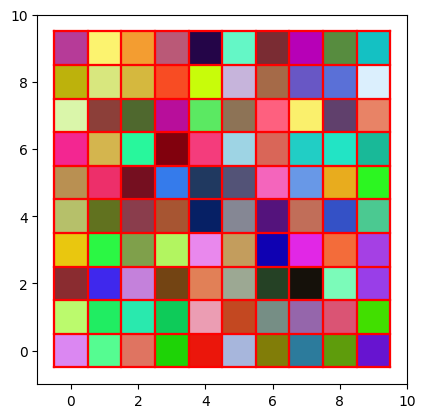

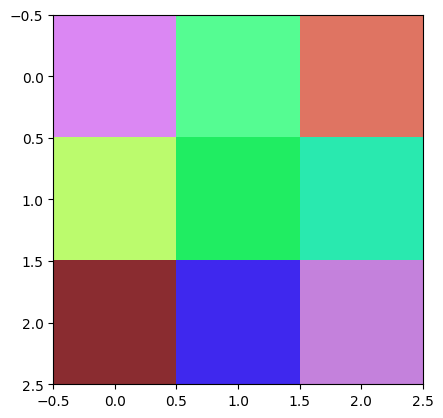

In [4]:
Cred = C[:,:,0]
print(Cred)
Cgreen = C[:,:,1]
Cblue = C[:,:,2]

Ured, sigmared, Vred = np.linalg.svd(Cred)
Ugreen, sigmagreen, Vgreen = np.linalg.svd(Cgreen)
Ublue, sigmablue, Vblue = np.linalg.svd(Cblue)

U = np.zeros((Ured.shape[0], Ublue.shape[1],3));
U[:,:,0] = Ured;
U[:,:,1] = Ugreen;
U[:,:,2] = Ublue;

sigma = np.zeros((sigmared.shape[0],3));
sigma[:,0] = sigmared;
sigma[:,1] = sigmagreen;
sigma[:,2] = sigmablue;

V = np.zeros((Vred.shape[0], Vblue.shape[1],3));
V[:,:,0] = Vred;
V[:,:,1] = Vgreen;
V[:,:,2] = Vblue;

reconstimg = np.zeros(C.shape)
for i in range(3):
    reconstimg[:,:,i] = (np.trunc(  np.matmul( U[:, :5,i], np.matmul(np.diag(sigma[:5,i]) , (V[:5, :,i]) ) ) ))
print(C[:,:,0])
print(reconstimg[:,:,0].astype(int))
plt.imshow(reconstimg.astype(int));
plt.show()
plt.imshow(C);

plt.show()

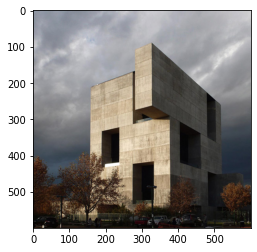

In [8]:
img = Image.open('edif_elemental.png');
imgRGB = img.convert('RGB')
imshow(imgRGB, interpolation='none');

# convert to matrix
#imgmat = np.array(list(imgRGB.getdata()), int)
imgmat = np.array(imgRGB)

plt.imshow(imgmat);
#imgmat = np.matrix(imgmat)
#print(imgmat)

In [9]:
Cred = imgmat[:,:,0]
Cgreen = imgmat[:,:,1]
Cblue = imgmat[:,:,2]

Ured, sigmared, Vred = np.linalg.svd(Cred)
Ugreen, sigmagreen, Vgreen = np.linalg.svd(Cgreen)
Ublue, sigmablue, Vblue = np.linalg.svd(Cblue)

U = np.zeros((Ured.shape[0], Ublue.shape[1],3));
U[:,:,0] = Ured;
U[:,:,1] = Ugreen;
U[:,:,2] = Ublue;

sigma = np.zeros((sigmared.shape[0],3));
sigma[:,0] = sigmared;
sigma[:,1] = sigmagreen;
sigma[:,2] = sigmablue;

V = np.zeros((Vred.shape[0], Vblue.shape[1],3));
V[:,:,0] = Vred;
V[:,:,1] = Vgreen;
V[:,:,2] = Vblue;

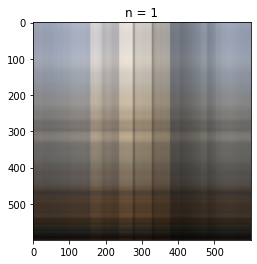

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


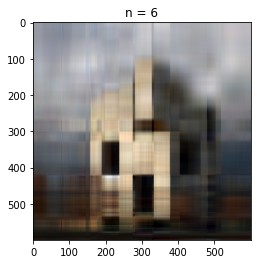

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


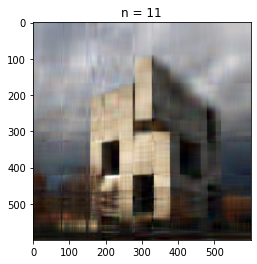

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


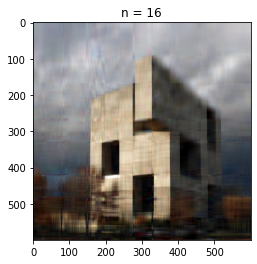

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


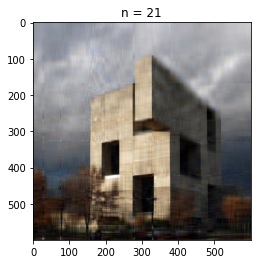

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


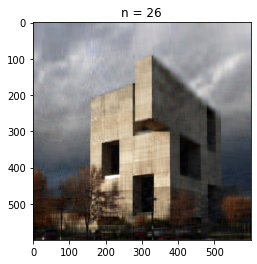

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


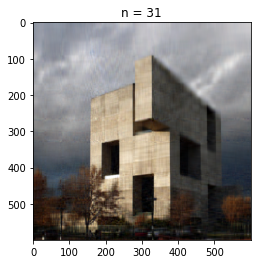

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


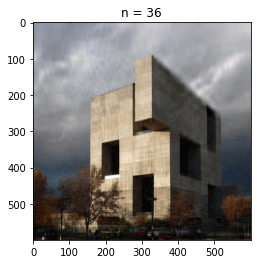

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


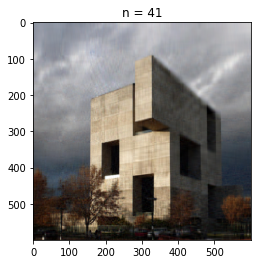

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


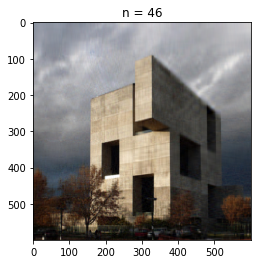

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


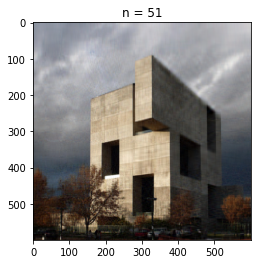

In [10]:
for n in range(1, 52, 3):
    reconstimg = np.zeros(imgmat.shape)
    for i in range(3):
        reconstimg[:,:,i] = (np.trunc(  np.matmul( U[:, :n,i], np.matmul(np.diag(sigma[:n,i]) , (V[:n, :,i]) ) ) ))

    #print(reconstimg)
    plt.imshow(reconstimg.astype(int))
    title = "n = %s" % n
    plt.title(title)
    plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([

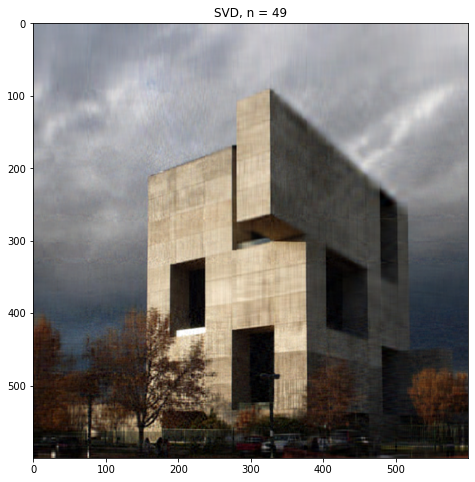

In [12]:
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots(figsize=(8,8))
def update(n):
    reconstimg = np.zeros(imgmat.shape)
    for i in range(3):
        reconstimg[:,:,i] = (np.trunc(  np.matmul( U[:, :n,i], np.matmul(np.diag(sigma[:n,i]) , (V[:n, :,i]) ) ) ))
    ax.imshow(reconstimg.astype(int))
    title = "SVD, n = %s" % n
    plt.title(title)
 
anim = FuncAnimation(fig, update, frames = 50, interval=100)
anim.save('SVD_elemental_color.gif', dpi=200) 
plt.show()